# The Wishart Ensamble
Drawing a gaussian random matrix of size $(N,T)$ we can build a Wishart matrix by:
$$
    M = \frac{XX^T}{N}
$$

Properites:
- Positive Eigenvalues
- Dependence of the eigenvalues distribution through $q=\frac{N}{T}$

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix sizes and variance
sizes = [(8000, 4000), (4000, 4000), (4000, 8000)]
var = 1  # Variance for the normal distribution
evs = []

# Calculate eigenvalues for each matrix size
for size in sizes:
    X = np.random.normal(0, var, size=size)  
    M = (X @ X.T) / size[0]  
    e1 = np.linalg.eigvals(M)  
    e1 = np.real_if_close(e1)  # Ensure no numerical errors (real part)
    evs.append(e1)

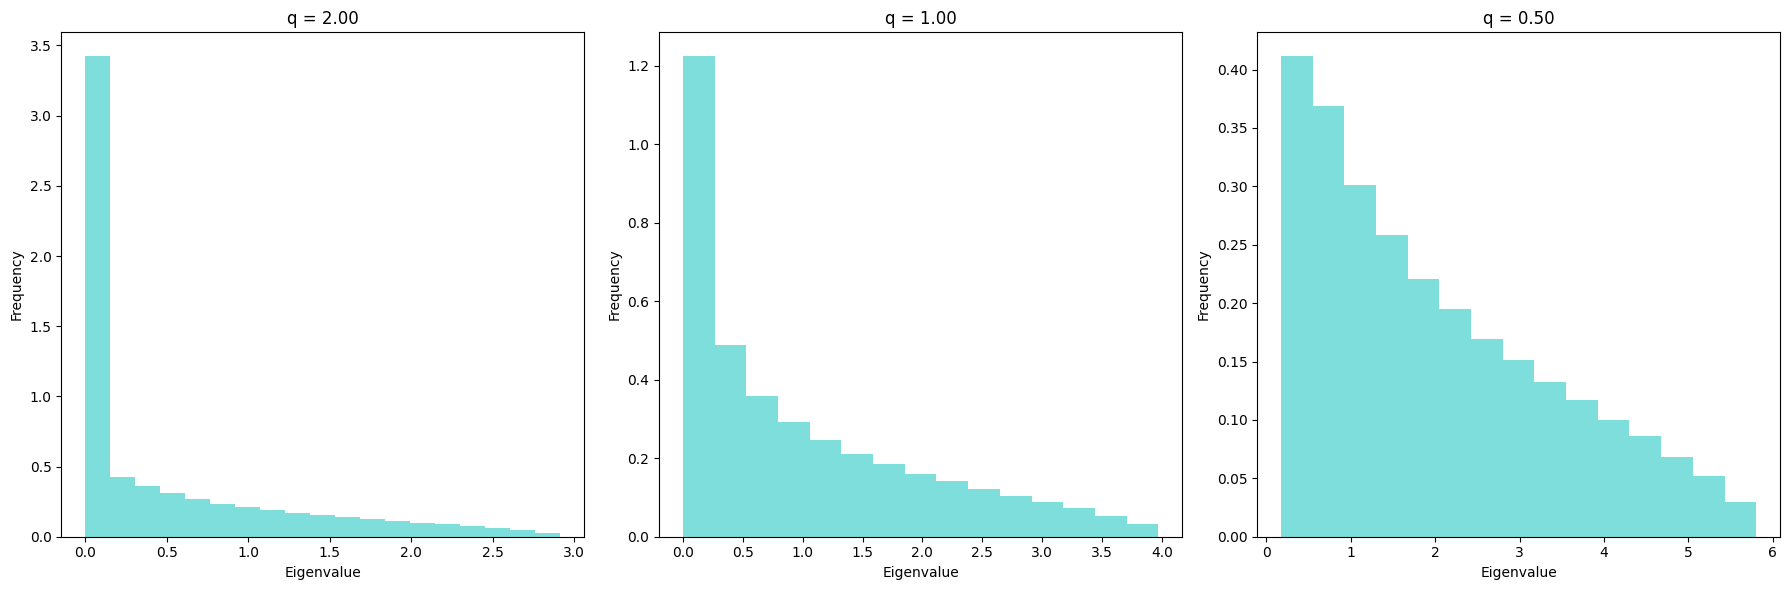

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (size, eigenvalues) in zip(axes, zip(sizes, evs)):
    ax.hist(eigenvalues, bins=int(len(eigenvalues)**(1/3)), alpha=0.7, color="mediumturquoise", density=True)
    ax.set_title(f"q = {size[0]/size[1]:.2f}")
    ax.set_xlabel("Eigenvalue")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### BBP Transition
Let $M$ be a random matrix, $U$ unitary vector and $a$ signal to noise ratio
$$
    Y = M + a UU^T
$$

In [47]:
size = (1000, 2000)
a = 7
var = 1  # Variance for the normal distribution

# Generate the random matrix and calculate Y
X = np.random.normal(0, var, size=size)
M = (X @ X.T) / size[0]  

U = np.zeros(size[0])
U[0] = 1  

Y = M + a * np.outer(U, U)  

# Compute eigenvalues
e1 = np.linalg.eigvals(Y)
e1 = np.real_if_close(e1)  

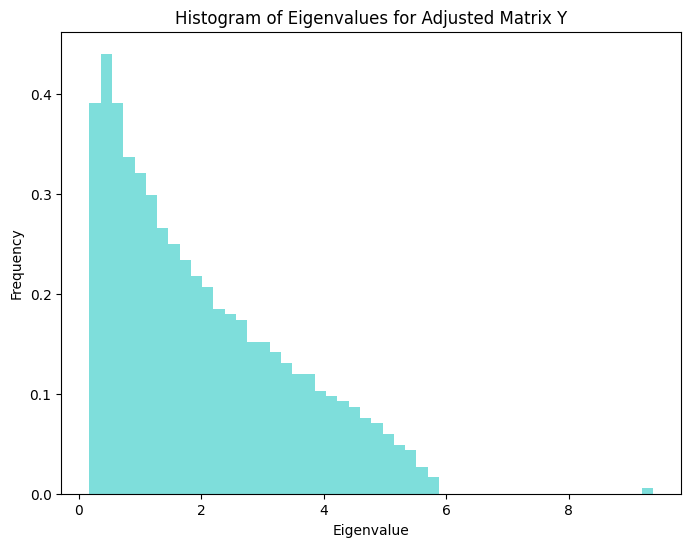

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(e1, bins=50, alpha=0.7, color="mediumturquoise", density=True)
plt.title("Histogram of Eigenvalues for Matrix Y")
plt.xlabel("Eigenvalue")
plt.ylabel("Frequency")
plt.show()

We can see the signal in the outlier eigenvalue